### Import pandas and read in the csv file and set it to a dataframe called baskets

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

### read in data, make columns for date, year, month, day, hour, weekday, from the "placed_at" column 

In [2]:
filename = './AwanTunai_transaction_data.csv'
baskets = pd.read_csv(filename)

### Transformations
 - adding new columns: spent on SKU
 - transform the string field of "placed_at" into various time and date units: year, month, week, date, day of week, etc.

 - adding a column for spent: obtained by multiplying quantity (qty) and price

In [3]:
baskets["spent"] = baskets["qty"] * baskets["price"]

 - convert "placed_at" into various time units

In [4]:
from datetime import datetime, timedelta

baskets['datetime'] = pd.to_datetime(baskets['placed_at'])
baskets['year'] = baskets["datetime"].dt.year
baskets['month'] = baskets["datetime"].dt.month
baskets['date'] = baskets["datetime"].dt.date
baskets['day'] = baskets["datetime"].dt.day
baskets['hour'] = baskets["datetime"].dt.hour
baskets['weekday'] = baskets["datetime"].dt.weekday
baskets['year_month'] = baskets["datetime"].apply(lambda t: t.strftime("%Y-%m"))
baskets['month_num'] = (baskets['year'] - 2021) * 12 + baskets['month']
baskets['year_week'] = baskets["datetime"].apply(lambda t: t.strftime("%Y-%W")) # this makes the beginning of Jan 2022 as week 2022-00 , not 2022-52
baskets['week_num'] = baskets["datetime"].apply(lambda t: int(t.strftime("%W"))) 
baskets['iso_week_num'] = baskets["datetime"].dt.isocalendar().week # this returns week number 52 for Jan 1, 2021, not 0 which is what we want
baskets['cum_week_num'] = (baskets['year'] - 2021) * 52 + baskets['week_num']

 - inspect the results
 - usually at the time boundaries: beginning or ending of the time units: beginning of 2022 or end of 2021 and 2022

 - use of "query" syntax

In [5]:
baskets.query("year_month == '2021-12'")

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
89862,89864,8568,2021-12-01 00:19:40.609,49,971,27.0,86.0,10,18300.0,183000.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
89863,89865,8568,2021-12-01 00:19:40.609,49,867,27.0,86.0,1,180500.0,180500.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
89864,89866,8568,2021-12-01 00:19:40.609,49,1338,27.0,86.0,1,180500.0,180500.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
89865,89867,8568,2021-12-01 00:19:40.609,49,851,27.0,86.0,5,12900.0,64500.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
89866,89868,8568,2021-12-01 00:19:40.609,49,1313,27.0,86.0,5,14700.0,73500.0,...,2021-12-01,1,0,2,2021-12,12,2021-48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118578,118594,11165,2021-12-31 17:51:37.641,38,976,27.0,86.0,5,12200.0,61000.0,...,2021-12-31,31,17,4,2021-12,12,2021-52,52,52,52
118579,118595,11165,2021-12-31 17:51:37.641,38,979,27.0,86.0,5,20300.0,101500.0,...,2021-12-31,31,17,4,2021-12,12,2021-52,52,52,52
118580,118596,11165,2021-12-31 17:51:37.641,38,1059,10.0,45.0,1,95000.0,95000.0,...,2021-12-31,31,17,4,2021-12,12,2021-52,52,52,52
118581,118597,11165,2021-12-31 17:51:37.641,38,660,14.0,34.0,4,10500.0,42000.0,...,2021-12-31,31,17,4,2021-12,12,2021-52,52,52,52


In [6]:
baskets.query("year_month == '2022-01'")

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
118583,118609,11169,2022-01-02 08:41:25.676,191,899,5.0,86.0,3,31500.0,94500.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
118584,118610,11169,2022-01-02 08:41:25.676,191,972,27.0,86.0,1,369000.0,369000.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
118585,118611,11169,2022-01-02 08:41:25.676,191,1217,27.0,86.0,3,30000.0,90000.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
118586,118612,11169,2022-01-02 08:41:25.676,191,874,27.0,86.0,1,160500.0,160500.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
118587,118613,11169,2022-01-02 08:41:25.676,191,1504,27.0,86.0,1,239000.0,239000.0,...,2022-01-02,2,8,6,2022-01,13,2022-00,0,52,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150123,150131,14163,2022-01-31 17:05:15.920,126,874,27.0,86.0,1,163000.0,163000.0,...,2022-01-31,31,17,0,2022-01,13,2022-05,5,5,57
150124,150132,14163,2022-01-31 17:05:15.920,126,971,27.0,86.0,10,18700.0,187000.0,...,2022-01-31,31,17,0,2022-01,13,2022-05,5,5,57
150125,150133,14163,2022-01-31 17:05:15.920,126,992,27.0,86.0,1,250000.0,250000.0,...,2022-01-31,31,17,0,2022-01,13,2022-05,5,5,57
150126,150134,14163,2022-01-31 17:05:15.920,126,1504,27.0,86.0,1,240500.0,240500.0,...,2022-01-31,31,17,0,2022-01,13,2022-05,5,5,57


### Study of merchants
 - how many merchants?
  - by each year
  - by each month
  - by each weekday
 - how often did they buy?
  - how many times did they buy
  - how many months did they buy?

 - what did they buy?
   - their unique SKU
   - their top SKU
 - how much did they spend?

In [7]:
### how many merchants

In [8]:
baskets.groupby(['year']).nunique()

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
year,,,,,,,,,,,,,,,,,,,,,
2021,118583,11152,11149,238,1710,35,105,88,939,1741,...,188,31,20,7,7,7,29,29,29,29
2022,373854,42286,42285,333,1192,32,93,56,1236,2895,...,356,31,24,7,12,12,53,53,52,53


In [9]:
baskets.groupby(['year_month']).nunique()

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,month,date,day,hour,weekday,month_num,year_week,week_num,iso_week_num,cum_week_num
year_month,,,,,,,,,,,,,,,,,,,,,
2021-06,2888,338,338,14,458,31,70,44,339,524,...,1,8,8,11,5,1,3,3,3,3
2021-07,10494,1056,1056,11,558,33,78,48,408,714,...,1,29,29,12,7,1,5,5,5,5
2021-08,7681,843,843,3,534,32,75,51,342,624,...,1,30,30,11,7,1,6,6,6,6
2021-09,9136,1063,1063,48,548,33,75,48,379,670,...,1,30,30,11,7,1,5,5,5,5
2021-10,31897,2907,2904,196,1480,35,103,69,580,878,...,1,30,30,16,7,1,5,5,5,5
2021-11,27766,2429,2429,182,971,32,89,31,402,851,...,1,30,30,19,7,1,5,5,5,5
2021-12,28721,2516,2516,185,959,32,88,36,505,1084,...,1,31,31,19,7,1,5,5,5,5
2022-01,31545,2994,2994,205,993,32,89,31,550,1153,...,1,30,30,21,7,1,6,6,6,6
2022-02,27985,2824,2824,206,975,32,88,30,491,1029,...,1,27,27,20,7,1,5,5,5,5


### on average, how many merchants transact on each weekday?

 - use of agg 

In [10]:
baskets.groupby(['date','weekday']).agg(
    num_merchants = ('merchant_id', 'nunique')).reset_index().groupby('weekday').mean()

,num_merchants
weekday,
0,51.597403
1,45.906667
2,46.166667
3,44.887500
4,45.814815
5,48.784810
6,43.270270


In [11]:
pd.DataFrame({'merchant_cnt' : baskets.groupby(['date','weekday'])['merchant_id'].nunique()}).reset_index().groupby(['weekday'])['merchant_cnt'].mean()

weekday
0    51.597403
1    45.906667
2    46.166667
3    44.887500
4    45.814815
5    48.784810
6    43.270270
Name: merchant_cnt, dtype: float64

### compute various attributes about each merchant

 - use a function

In [12]:
def get_merchant_attributes(baskets):
    merchant_attributes = baskets.groupby(['merchant_id']).agg(
        total_spent = ('spent', 'sum'), 
        num_orders = ('order_id', 'nunique'), 
        first_month = ('month_num', 'min'), 
        last_month = ('month_num', 'max'), 
        num_months = ('month_num', 'nunique'), 
        num_weeks = ('week_num', 'nunique'), 
        num_days = ('date', 'nunique'), 
        num_skus = ('sku_id','nunique'), 
        num_top_cats = ('top_cat','nunique'), 
        num_sub_cats = ('sub_cat','nunique'),
    ).reset_index()
    merchant_attributes['avg_spent_per_order'] = merchant_attributes.total_spent / merchant_attributes.num_orders
    merchant_attributes['tenure_month'] = merchant_attributes.last_month - merchant_attributes.first_month +1
    return merchant_attributes

 - the above function assumes that baskets already has all the date columns, let's make a function for adding those date columns

In [13]:
def add_date_cols(baskets):
    baskets['datetime'] = pd.to_datetime(baskets['placed_at'])
    baskets['year'] = baskets["datetime"].dt.year
    baskets['month'] = baskets["datetime"].dt.month
    baskets['date'] = baskets["datetime"].dt.date
    baskets['day'] = baskets["datetime"].dt.day
    baskets['hour'] = baskets["datetime"].dt.hour
    baskets['weekday'] = baskets["datetime"].dt.weekday
    baskets['year_month'] = baskets["datetime"].apply(lambda t: t.strftime("%Y-%m"))
    baskets['month_num'] = (baskets['year'] - 2021) * 12 + baskets['month']
    baskets['year_week'] = baskets["datetime"].apply(lambda t: t.strftime("%Y-%W")) # this makes the beginning of Jan 2022 as week 2022-00 , not 2022-52
    baskets['week_num'] = baskets["datetime"].apply(lambda t: int(t.strftime("%W"))) 
    baskets['iso_week_num'] = baskets["datetime"].dt.isocalendar().week # this returns week number 52 for Jan 1, 2021, not 0 which is what we want
    baskets['cum_week_num'] = (baskets['year'] - 2021) * 52 + baskets['week_num']
    return baskets

In [14]:
filename = './AwanTunai_transaction_data.csv'
baskets = pd.read_csv(filename)
baskets["spent"] = baskets["qty"] * baskets["price"]
baskets = add_date_cols(baskets)
merchant_attributes = get_merchant_attributes(baskets)

In [15]:
merchant_attributes.head(3)

,merchant_id,total_spent,num_orders,first_month,last_month,num_months,num_weeks,num_days,num_skus,num_top_cats,num_sub_cats,avg_spent_per_order,tenure_month
0,1,11802400.0,11,13,21,4,6,8,52,12,19,1.072945e+06,9
1,2,16119100.0,13,12,24,6,10,11,53,13,21,1.239931e+06,13
2,3,38055700.0,37,11,16,6,13,26,145,24,43,1.028532e+06,6


In [16]:
### manual inspection to double chefck

In [17]:
baskets.query("merchant_id ==1")

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price,spent,...,date,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num
144899,144924,13662,2022-01-27 13:30:34.838,1,1744,12.0,1.0,1,89000.0,89000.0,...,2022-01-27,27,13,3,2022-01,13,2022-04,4,4,56
217332,217354,21239,2022-04-08 10:42:37.173,1,1498,27.0,86.0,1,251500.0,251500.0,...,2022-04-08,8,10,4,2022-04,16,2022-14,14,14,66
217333,217355,21239,2022-04-08 10:42:37.173,1,992,27.0,86.0,1,250500.0,250500.0,...,2022-04-08,8,10,4,2022-04,16,2022-14,14,14,66
217334,217356,21239,2022-04-08 10:42:37.173,1,1589,26.0,39.0,1,47000.0,47000.0,...,2022-04-08,8,10,4,2022-04,16,2022-14,14,14,66
217335,217357,21239,2022-04-08 10:42:37.173,1,1004,15.0,34.0,1,29000.0,29000.0,...,2022-04-08,8,10,4,2022-04,16,2022-14,14,14,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389568,389573,41132,2022-09-27 13:47:20.418,1,1208,27.0,86.0,5,30500.0,152500.0,...,2022-09-27,27,13,1,2022-09,21,2022-39,39,39,91
389569,389574,41132,2022-09-27 13:47:20.418,1,923,27.0,86.0,1,302000.0,302000.0,...,2022-09-27,27,13,1,2022-09,21,2022-39,39,39,91
389570,389575,41132,2022-09-27 13:47:20.418,1,697,27.0,86.0,1,152000.0,152000.0,...,2022-09-27,27,13,1,2022-09,21,2022-39,39,39,91
389571,389576,41132,2022-09-27 13:47:20.418,1,1655,18.0,61.0,3,36000.0,108000.0,...,2022-09-27,27,13,1,2022-09,21,2022-39,39,39,91


### let's do some plotting

<AxesSubplot:xlabel='year_week'>

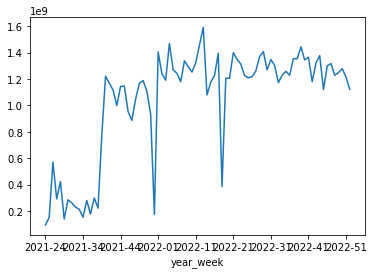

In [18]:
baskets.groupby("year_week").spent.sum().plot()

 - use plt.figure(figsize=(15,3))  to set size, or put figsize=(15,3) as argument into the plot function

<AxesSubplot:xlabel='year_week'>

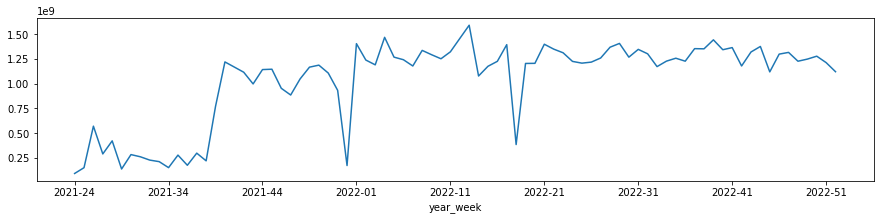

In [19]:
plt.figure(figsize=(15,3))
baskets.groupby("year_week").spent.sum().plot()

<AxesSubplot:xlabel='year_week'>

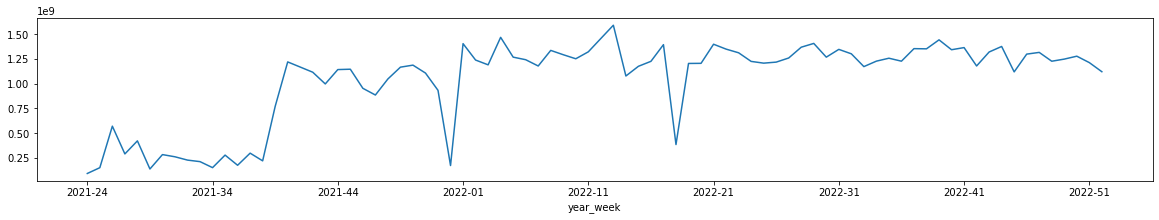

In [20]:
baskets.groupby("year_week").spent.sum().plot(figsize=(20,3))

<AxesSubplot:xlabel='year_week'>

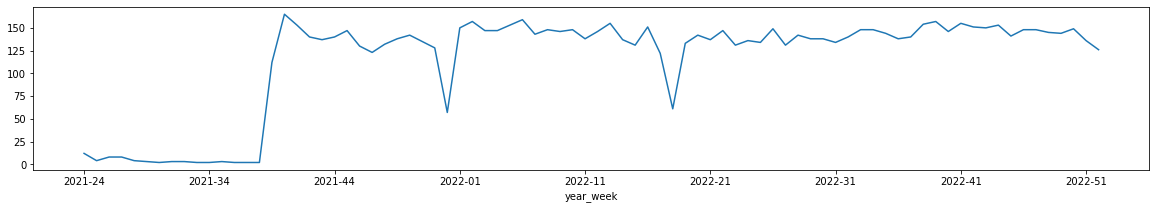

In [21]:
baskets.groupby("year_week").merchant_id.nunique().plot(figsize=(20,3))

<AxesSubplot:xlabel='year_week'>

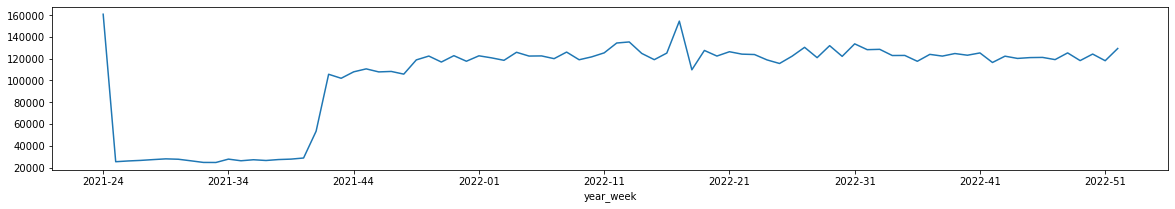

In [22]:
baskets.groupby("year_week").price.mean().plot(figsize=(20,3))

<AxesSubplot:>

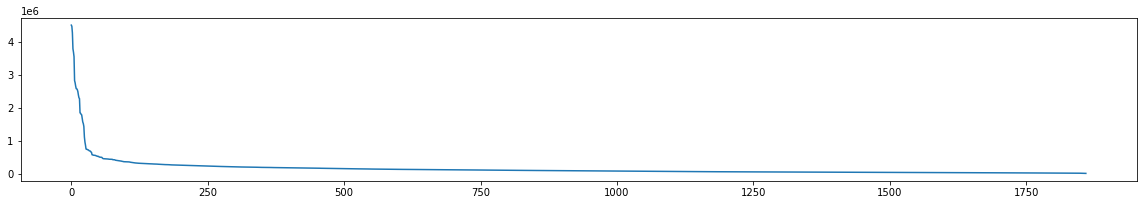

In [23]:
baskets.groupby("sku_id")['spent'].mean().sort_values(ascending=False).reset_index(drop=True).plot(figsize=(20,3))

### what can be observed from those plot? 
 - there are a bit less than 2 thousands SKUs
 - less than 10 percents of the SKUs contribute to the majority of the spent

In [24]:
baskets.groupby("sku_id")['spent'].max().sort_values(ascending=False).reset_index().head(10)

,sku_id,spent
0,207,28356000.0
1,1502,25050000.0
2,970,22530000.0
3,865,18575000.0
4,874,16175000.0
5,990,15030000.0
6,1737,11835000.0
7,872,10335000.0
8,1736,8715000.0
9,975,8190000.0


 - inspect the prices of a few top items

<AxesSubplot:xlabel='date'>

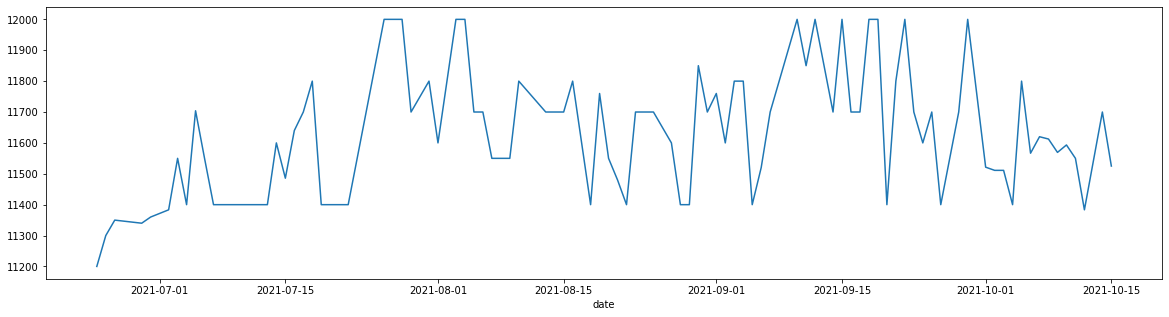

In [25]:
baskets.query("sku_id==207").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

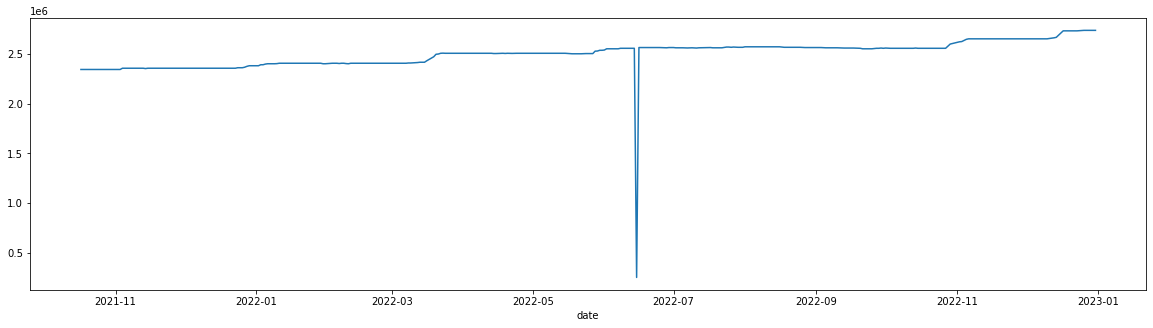

In [26]:
baskets.query("sku_id==1502").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

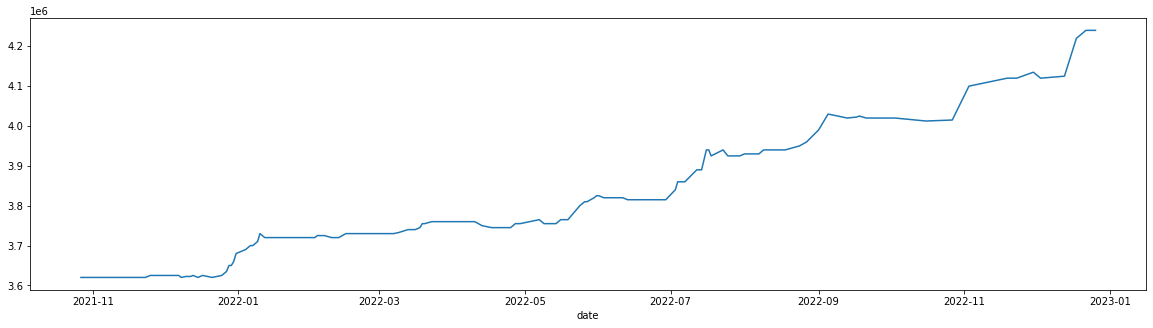

In [27]:
baskets.query("sku_id==970").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

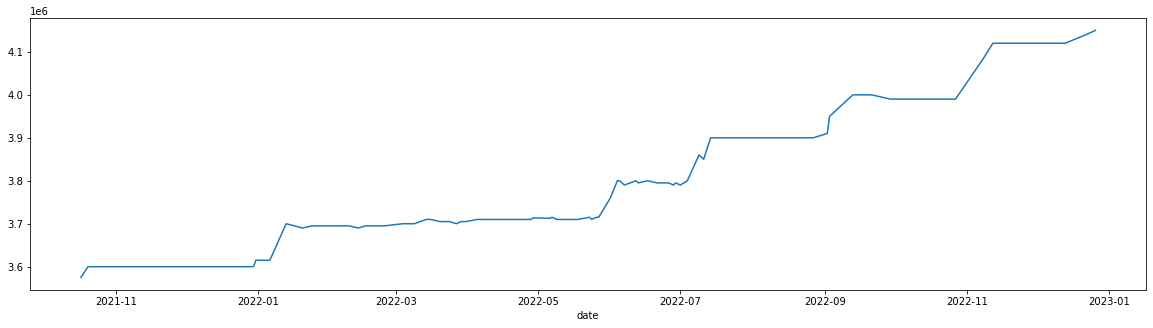

In [28]:
baskets.query("sku_id==865").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

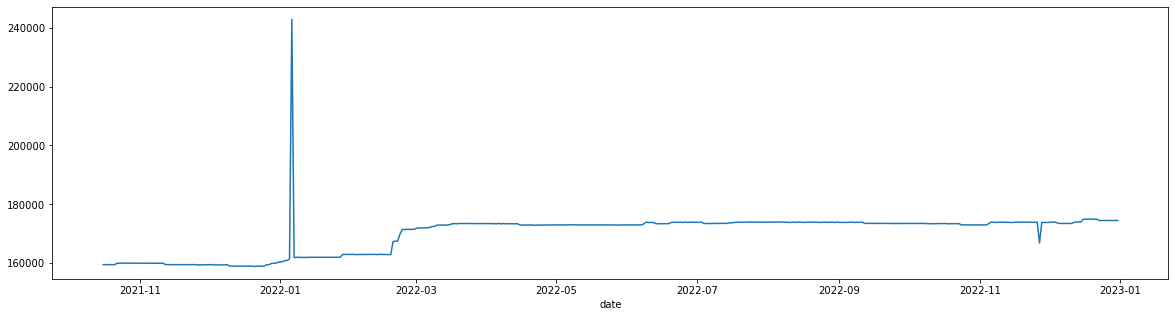

In [29]:
baskets.query("sku_id==874").groupby(['date']).price.mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='merchant_id'>

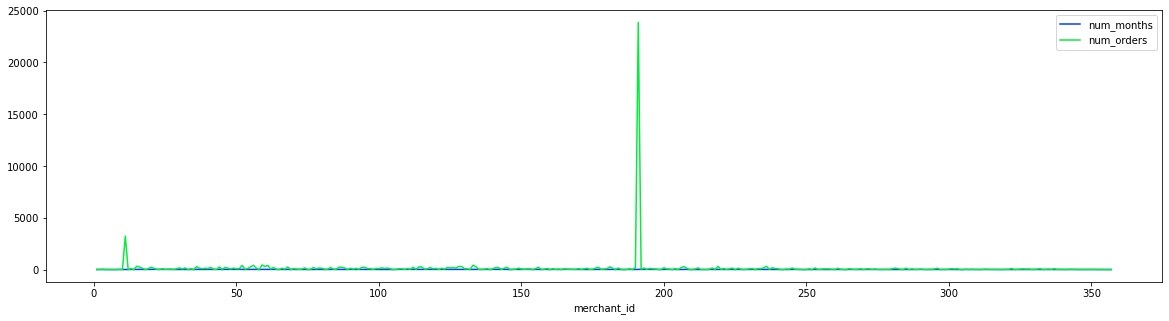

In [30]:
plt.style.use('seaborn-bright')
baskets.groupby(['merchant_id']).agg(
    num_months = ("year_month", "nunique"),
    num_orders = ("order_id", "nunique")).plot(figsize=(20,5))


<AxesSubplot:xlabel='year_week'>

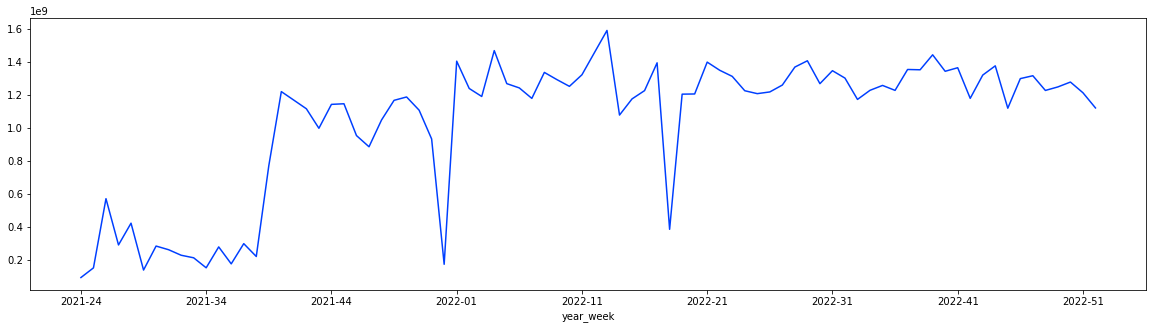

In [31]:
baskets.groupby("year_week").spent.sum().plot(figsize=(20,5))

### do the same SKUs within the same order have the same price?
 - by counting the unique number of prices within the same order on the same sku

In [32]:
baskets.groupby(["order_id","sku_id"]).price.nunique().sort_values(ascending=False).head(10)

order_id  sku_id
35648     874       2
35285     1504      2
22691     1054      2
35098     874       2
34868     874       2
25707     1051      2
35916     1504      2
33720     1171      1
          971       1
          880       1
Name: price, dtype: int64

 - this says there are such cases, but only 7 such orders, and only 2 distict price values for the same sku

In [33]:
od = baskets.groupby(["order_id","sku_id"]).price.nunique().reset_index()

In [34]:
odd = od[od.price > 1]

In [35]:
odd

,order_id,sku_id,price
231379,22691,1054,2
258365,25707,1051,2
337754,34868,874,2
339529,35098,874,2
340946,35285,1504,2
343731,35648,874,2
346017,35916,1504,2


 - merge back to baskets to locate the full transaction records

In [36]:
baskets.merge(odd, left_on=["order_id", "sku_id"],right_on=["order_id", "sku_id"])

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price_x,spent,...,day,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num,price_y
0,231128,22691,2022-04-22 10:45:03.279,280,1054,10.0,45.0,1,78000.0,78000.0,...,22,10,4,2022-04,16,2022-16,16,16,68,2
1,231129,22691,2022-04-22 10:45:03.279,280,1054,10.0,45.0,1,104000.0,104000.0,...,22,10,4,2022-04,16,2022-16,16,16,68,2
2,258281,25707,2022-05-25 11:32:51.909,283,1051,10.0,45.0,1,89000.0,89000.0,...,25,11,2,2022-05,17,2022-21,21,21,73,2
3,258282,25707,2022-05-25 11:32:51.909,283,1051,10.0,45.0,1,99000.0,99000.0,...,25,11,2,2022-05,17,2022-21,21,21,73,2
4,339135,34868,2022-08-11 08:16:00.675,68,874,27.0,86.0,1,173000.0,173000.0,...,11,8,3,2022-08,20,2022-32,32,32,84,2
5,339136,34868,2022-08-11 08:16:00.675,68,874,27.0,86.0,1,174000.0,174000.0,...,11,8,3,2022-08,20,2022-32,32,32,84,2
6,340344,35098,2022-08-12 11:16:11.746,68,874,27.0,86.0,1,173000.0,173000.0,...,12,11,4,2022-08,20,2022-32,32,32,84,2
7,340345,35098,2022-08-12 11:16:11.746,68,874,27.0,86.0,2,174000.0,348000.0,...,12,11,4,2022-08,20,2022-32,32,32,84,2
8,340890,35285,2022-08-12 17:07:46.285,236,1504,27.0,86.0,1,252500.0,252500.0,...,12,17,4,2022-08,20,2022-32,32,32,84,2
9,340891,35285,2022-08-12 17:07:46.285,236,1504,27.0,86.0,1,257000.0,257000.0,...,12,17,4,2022-08,20,2022-32,32,32,84,2


 - looking at the orders, including all skus in the orders

In [37]:
baskets.merge(odd, left_on=["order_id"],right_on=["order_id"])

,id,order_id,placed_at,merchant_id,sku_id_x,top_cat,sub_cat,qty,price_x,spent,...,hour,weekday,year_month,month_num,year_week,week_num,iso_week_num,cum_week_num,sku_id_y,price_y
0,231127,22691,2022-04-22 10:45:03.279,280,1059,10.0,45.0,1,74250.0,74250.0,...,10,4,2022-04,16,2022-16,16,16,68,1054,2
1,231128,22691,2022-04-22 10:45:03.279,280,1054,10.0,45.0,1,78000.0,78000.0,...,10,4,2022-04,16,2022-16,16,16,68,1054,2
2,231129,22691,2022-04-22 10:45:03.279,280,1054,10.0,45.0,1,104000.0,104000.0,...,10,4,2022-04,16,2022-16,16,16,68,1054,2
3,231317,22691,2022-04-22 10:45:03.279,280,973,27.0,86.0,3,71500.0,214500.0,...,10,4,2022-04,16,2022-16,16,16,68,1054,2
4,231318,22691,2022-04-22 10:45:03.279,280,1501,27.0,86.0,2,181000.0,362000.0,...,10,4,2022-04,16,2022-16,16,16,68,1054,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,351625,35916,2022-08-23 19:04:13.531,316,880,25.0,86.0,5,18400.0,92000.0,...,19,1,2022-08,20,2022-34,34,34,86,1504,2
71,351626,35916,2022-08-23 19:04:13.531,316,971,27.0,86.0,5,19800.0,99000.0,...,19,1,2022-08,20,2022-34,34,34,86,1504,2
72,351627,35916,2022-08-23 19:04:13.531,316,818,27.0,86.0,3,22300.0,66900.0,...,19,1,2022-08,20,2022-34,34,34,86,1504,2
73,351628,35916,2022-08-23 19:04:13.531,316,984,27.0,86.0,4,17800.0,71200.0,...,19,1,2022-08,20,2022-34,34,34,86,1504,2


In [38]:
baskets.groupby(by='top_cat')['price'].mean()

top_cat
1.0      97580.697252
2.0      21320.363636
3.0      29576.258993
4.0      82935.773206
5.0      84103.356815
6.0      49551.724138
7.0      28565.217391
8.0      42216.867470
9.0      28994.596542
10.0     86334.939256
11.0     10579.418573
12.0     82492.356305
13.0    113974.576271
14.0     89044.576501
15.0     82022.032556
16.0     87878.549228
17.0     56868.246612
18.0     40298.293490
19.0     52304.409820
20.0     85665.354500
21.0     20881.221218
22.0     37205.275531
23.0     41762.303727
24.0     77237.727760
25.0    103773.208743
26.0     87192.381326
27.0    155862.902361
28.0     76928.478825
29.0     69254.997814
30.0     56616.165495
31.0     87500.476948
32.0     37882.910789
33.0     45912.602459
34.0     77723.006302
35.0     41674.176514
Name: price, dtype: float64

<AxesSubplot:>

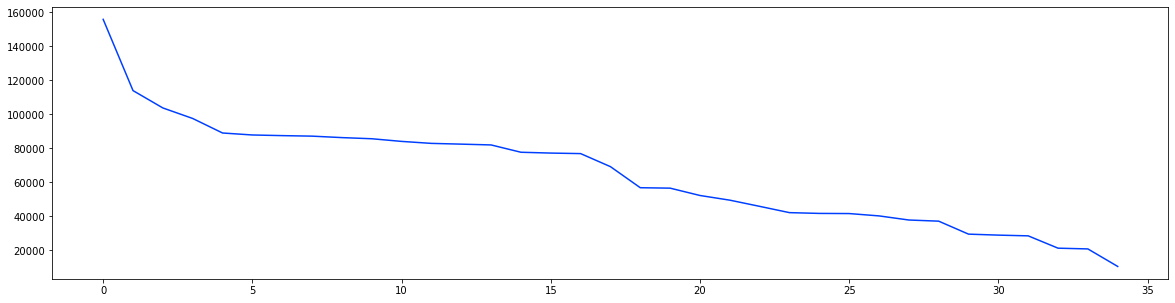

In [39]:
baskets.groupby(by='top_cat')['price'].mean().sort_values(ascending=False).reset_index(drop=True).plot(figsize=(20,5))

<AxesSubplot:>

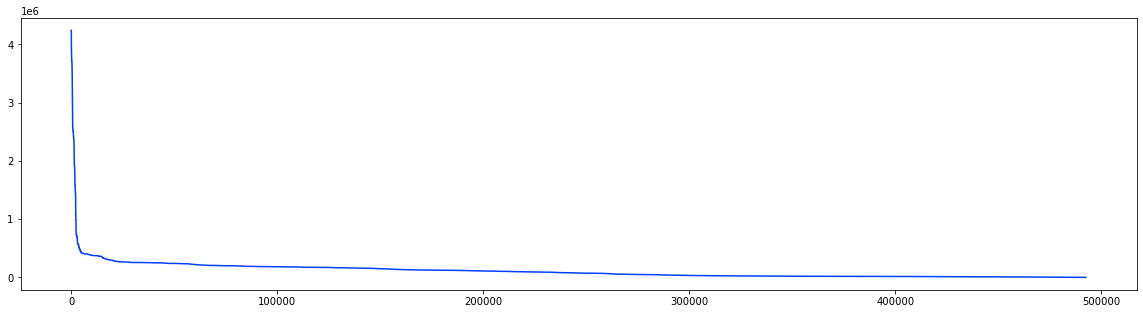

In [40]:
baskets.price.sort_values(ascending = False).reset_index(drop=True).plot(figsize=(20,5))

<AxesSubplot:>

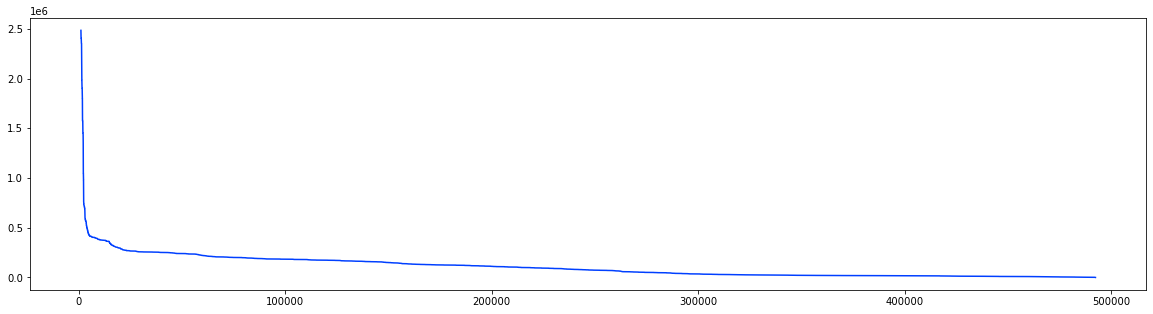

In [41]:
baskets.price.sort_values(ascending = False).reset_index(drop=True)[1000:].plot(figsize=(20,5))

<AxesSubplot:>

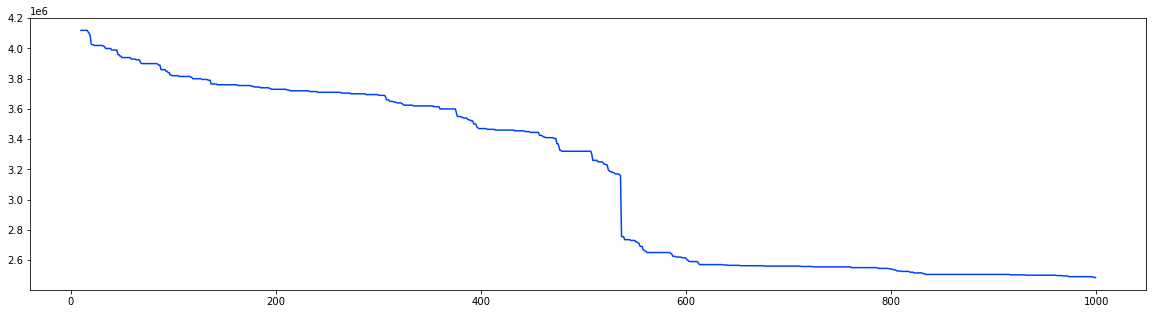

In [42]:
baskets.price.sort_values(ascending = False).reset_index(drop=True)[10:1000].plot(figsize=(20,5))